### Suffix tree construction

To be able to optimize the search for patterns within strings we need to do a couple of steps.
Firstly we need to construct a suffix tree that we can search through.
For this construction the most naive version would take O(n^2) time to construct and O(n^2) space
However it is possible to optimize it to O(n) runtime and O(n) space
Space can be optimized by change the edges from symbols to idx
runtime can be optimized by...

#### Naive construction

In [3]:
def construct_suffix_tree(s):
    # First we add $ to the string
    s = s + '$'
    suffix_tree = {}
    
    # make list of all suffixes
    suffixes = [s[i:] for i in range(len(s))]
    
    # insert suffixes
    for suffix in suffixes:
        starting_char = suffix[0]
        if starting_char not in suffix_tree:
            suffix_tree[starting_char] = []
        
        # Append the suffix to the list for the starting character
        suffix_tree[starting_char].append(suffix)
    
    # Return the suffix tree dictionary
    return suffix_tree

# Run the algoo
s = "banana"
suffix_tree = construct_suffix_tree(s)
print(suffix_tree)

{'b': ['banana$'], 'a': ['anana$', 'ana$', 'a$'], 'n': ['nana$', 'na$'], '$': ['$']}


Above might not give a usefull output. below is an outline of the algorithm 

In [ ]:
# Start at the root of Ni


# Find the longest path from the root which matches a prefix of S[i+1..m]$


# Match ends either at the node (say w) or in the middle of an edge [say (u, v)].


# If it is in the middle of an edge (u, v), break the edge (u, v) into two edges 
# by inserting a new node w just after the last character on the edge that matched a 
# character in S[i+l..m] and just before the first character on the edge that mismatched. 
# The new edge (u, w) is labelled with the part of the (u, v) label that matched with S[i+1..m], 
# and the new edge (w, v) is labelled with the remaining part of the (u, v) label.


# Create a new edge (w, i+1) from w to a new leaf labelled i+1 and it labels the new edge with 
# the unmatched part of suffix S[i+1..m]

##### Class based construction
Below a class was constructed to represent the nodes that points towards their children nodes. This can be used to form a tree of the letters found in each suffix.

In [105]:
from graphviz import Digraph

class SuffixTreeNode:
    def __init__(self):
        self.children = {}          # Dictionary to hold children nodes (edge label -> child node)
        self.index = -1             # Position in string
        self.suffix_number = -1     # placeholder for final index of a suffix


class SuffixTree:
    
    ####################################
    ########## Construction ############
    def __init__(self, text):
        self.text = text + "$"  # add $
        self.root = SuffixTreeNode()
        self.build_suffix_tree()

    def build_suffix_tree(self):
        """
        build the suffix tree inserting all suffixes of the text
        """
        n = len(self.text)
        
        for i in range(n):
            current_node = self.root
            suffix = self.text[i:] # slice the string to make suffixes (i starts with 0 so all of the string first)
            count = i
            for idx in range(len(suffix)):
                if suffix[idx] not in current_node.children: # character not found, create a new node
                    current_node.children[suffix[idx]] = SuffixTreeNode()
                current_node = current_node.children[suffix[idx]]  # Move to the child node
                current_node.index = count
                count += 1
            current_node.suffix_number = i  # updates the index when suffix is placed

    ###############################
    ####### Visualization #########
    def visualize(self, filename="suffix_tree"):
        """
        Visualize the suffix tree using Graphviz.
        """
        dot = Digraph(node_attr={'shape': 'ellipse', 'fontsize': '12', 'fixedsize': 'false'},
                      edge_attr={'fontsize': '10', 'fontcolor': 'blue', 'labelfontsize': '10', 
                                 'labeldistance': '1', 'labelangle': '0'})
        self._visualize_helper(self.root, dot)
        dot.render(filename, format='png', cleanup=True)
        print(f"Visualization saved as {filename}.png")
        return dot

    def _visualize_helper(self, node, dot, parent_id="root", edge_label=""):
        """
        Helper method to add nodes and edges to the Graphviz object.
        """
        node_id = str(id(node))
        
        # Node label
        if node.suffix_number != -1:
            label = f"({node.suffix_number})"
        else:
            label = ""

        dot.node(node_id, label, width="0.5", height="0.5", style="filled", color="lightgrey")

        # Add edge from parent to current node
        if parent_id != "root":
            dot.edge(parent_id, node_id, label=edge_label, fontsize="25", fontcolor="red")

        # Recursively add children
        for char, child_node in node.children.items():
            self._visualize_helper(child_node, dot, node_id, edge_label=char)


    ########################################
    ######## Additional functions ##########
    def search(self, pattern):
        """
        Search for a pattern in the text. returns the final idx if found
        """
        current_node = self.root
        matches = []
        for char in pattern:
            if char not in current_node.children:
                return "not found"  # Pattern not found
            current_node = current_node.children[char]
        
        # Return the index of the suffix where the pattern is found
        idx = current_node.index
        matches.append(idx)
        return matches
    
    # def longest_branch(self):
        
        # ideas:
        # search through the tree in a linear fashion
        # introduce a value to the object that keeps track of the generation nr
        # 
        
    # def spell_check():

    # def count number of '$' vs number of possible suffices
        # get len of suffix list again
        # depth-first search for leaves with '$' and count them


In [ ]:
# usage
string = "banana"
suffix_tree = SuffixTree(string)


#### Find longest branch in suffix tree #####
longest_branch = suffix_tree.longest_branch()

correct_len = len(string)
print(longest_branch == correct_len)

#### Validating the suffix trees

When the tree construction is complete, its a very good idea to validate if the trees are actually suffix trees. To do this we can check the different criteria that such a tree has and check if our trees generated follow those criteria.

Criteria we could potentially check:
- Spelling of the substring is correct, so we check if the longest string is the same length and is spell the same way as the original string
- Every node only has outgoing edges with unique starting symbols
- Check that every suffix possible is accounted for. There should be the same number of 
'$' as there are suffixes 

Below are some typical test sequences used as examples

##### Confirming criterias

Lets try to confirm some of the criteria outlined above. Lets start by investigating the longest branch in the tree

In [101]:
# defining a test string we wanna use
string = "banana"


#### Find longest branch in suffix tree #####
suffix_tree = SuffixTree(string)
longest_branch = suffix_tree.longest_branch()

correct_len = len(string)
print(longest_branch == correct_len)

##### Visualize the tree

Firstly using the function visualize and visualize helper. we can generate an image of the trees we make with graphviz.

Visualization saved as suffix_tree.png


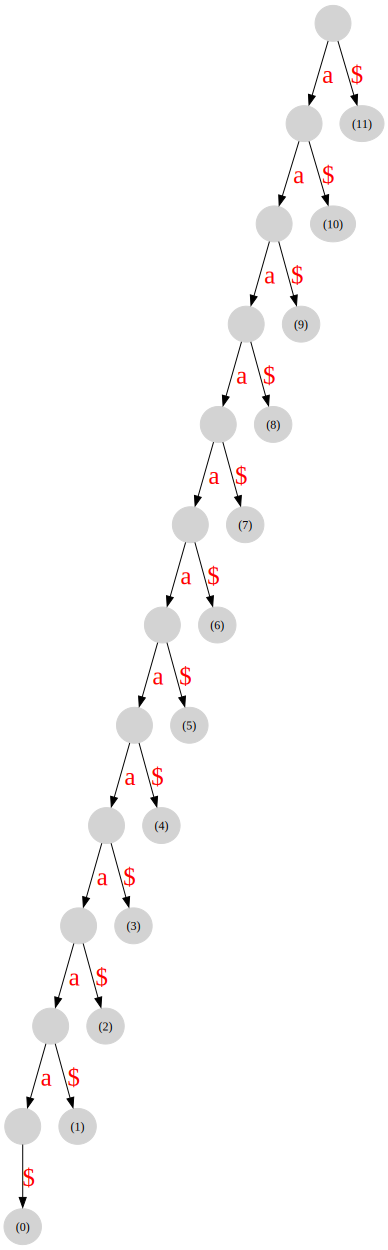

In [106]:
string = "aaaaaaaaaaa"
suffix_tree = SuffixTree(string)

# Visualize the tree using Graphviz
graph = suffix_tree.visualize()
display(graph)